###Processamento Digital de Sinais
####Atividade 01 - AB1
#####Aluno: Derek Nielsen Araújo Alves - 17212092

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def padding(l, n):
  if(len(l) > n):
    print("Não é possível efetuar o padding, pois len(list) >=", n)
    return l
  else:
    while len(l) < n:
      l = np.append(l, 0)
    return l

In [ ]:
def plotStem(y, tlt, idx, col): #Função para plotar dft e fft
  plt.subplot(1, 2, idx)
  plt.title(tlt)
  plt.stem(2.0/len(y)*abs(y), use_line_collection=True, linefmt="gray", basefmt="black", markerfmt = col)


In [ ]:
def plotStem2(y, tlt, idx, col): #plotar sinal original
  plt.subplot(1, 2, idx)
  plt.title(tlt)
  plt.stem(y, use_line_collection=True, linefmt="gray", basefmt="black", markerfmt = col)

##### 1. Considere a sequência x[n] = [6 8 5 4 5 6]. Implemente o algoritmo da transformada de Fourier Discreta (DFT), para 6, 8 e 32 pontos e analise o espectro frequencial desse sinal, validando os resultados com uma função fft já implementada. Implemente também a transformada discreta inversa de Fourier (IDFT) para restaurar a sequência original.

In [ ]:
l = np.array([6, 8, 5, 4, 5, 6])
pts = [6, 8, 32]

#####Implementando a DFT

In [ ]:
def DFT(X):
  samples = len(X) #Numero de amostras
  n = np.arange(samples) #DFT
  k = n.reshape(samples, 1)
  exp = (-2j * np.pi * k * n)/samples
  e = np.exp(exp, dtype=complex)
  return np.dot(e, X)

#####Plotando

Para 6 pontos, X[n] é:
 [6 8 5 4 5 6]


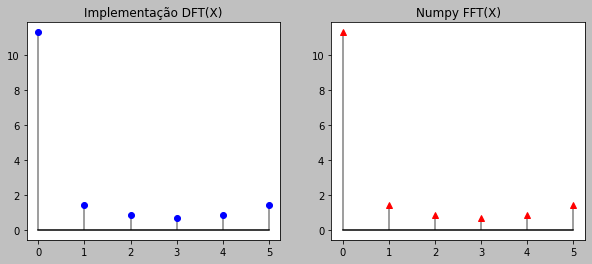


Para 8 pontos, X[n] é:
 [6 8 5 4 5 6 0 0]


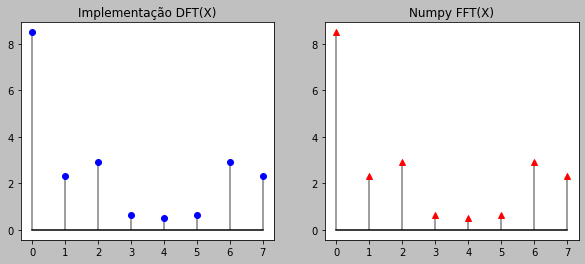


Para 32 pontos, X[n] é:
 [6 8 5 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


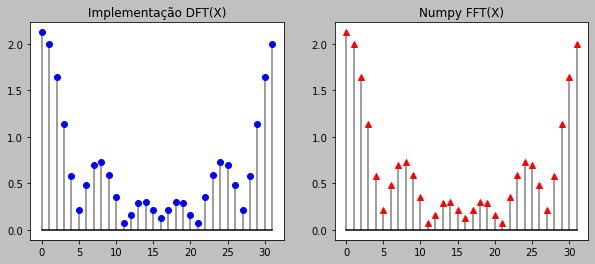

In [ ]:
for pt in pts:
  X = padding(l, pt) #Fazendo para 6, 8 e 32 pontos
  print("Para", pt, "pontos, X[n] é:\n", X)
  plt.figure(figsize=(10,4), facecolor="silver")
  y = DFT(X) #DFT Implementada
  plotStem(y, "Implementação DFT(X)", 1, "bo")
  y = np.fft.fft(X) #Numpy FFT
  plotStem(y, "Numpy FFT(X)", 2, "r^")

  plt.show()
  print()

<center>  <h4> Podemos observar que o resultado da NumpyFFT  é idêntico ao resultado obtido com o uso da DFT implementada, tornando assim válida a nossa implementação.

#####Implementando IDFT

In [ ]:
def iDFT(X):
  samples = len(X) #Amostras
  out = np.zeros(samples, dtype=complex)
  for k in range(samples):
    sum = 0
    for m in range(samples):
      exp = (2j * np.pi * k * m) * np.divide(1, samples, dtype=complex)
      sum+= X[m] * np.exp(exp)
    out[k] = np.divide(sum, samples, dtype=complex)
  return out

#####Plotando

Para 6 pontos, X[n] é:
 [6 8 5 4 5 6]


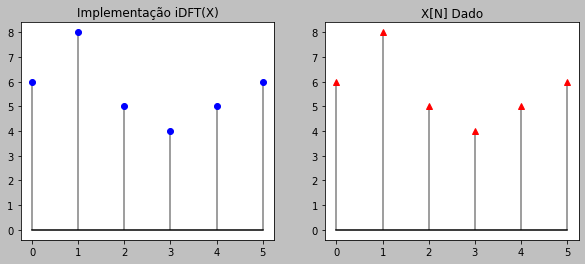


Para 8 pontos, X[n] é:
 [6 8 5 4 5 6 0 0]


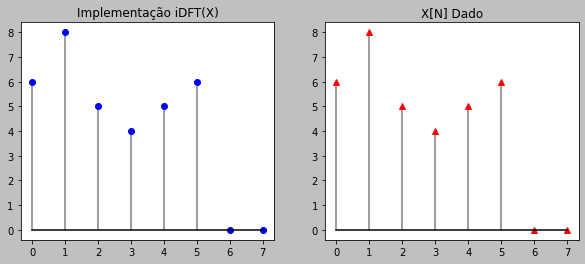


Para 32 pontos, X[n] é:
 [6 8 5 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


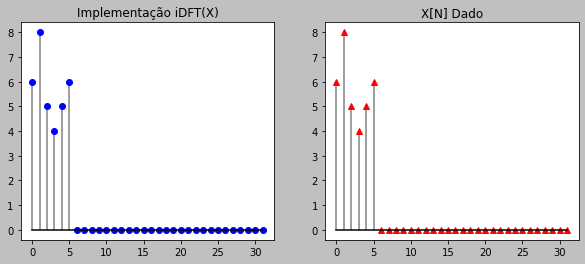

In [ ]:
for pt in pts:
  X = padding(l, pt)
  print("Para", pt, "pontos, X[n] é:\n", X)
  plt.figure(figsize=(10,4), facecolor="silver")
  y = DFT(X)
  y = iDFT(y)
  plotStem2(y, "Implementação iDFT(X)", 1, "bo")
  plotStem2(X, "X[N] Dado", 2, "r^")

  plt.show()
  print()

<center>  <h4> Podemos observar que o sinal original é idêntico ao sinal restaurado com o uso da iDFT implementada, o que valida nossa implementação.

#####2. Implemente o algoritmo de raiz de 2 (Radix-2) e de raiz de 3 (Radix-3), com decimaçãono tempo, da Transformada Rápida de Fourier (Fast Fourier Transform - FFT) para analisar o espectro frequencial do sinal da Atividade 1.Valide os resultados com uma função fft já implementada.

In [ ]:
#implementando radix2
def Radix_2(X):
  samples = len(X)
  if samples == 1:#caso base
    return X
  elif samples % 2 == 0: #recursão
    xp = Radix_2(X[0::2]) #indice começa em 0 com passo 2
    xi = Radix_2(X[1::2]) #começa em 1 com passo 2

    x = np.zeros(samples, dtype=complex)

    for m in range(samples):
      ma = m % (samples//2)
      exp = (-2j * np.pi * m/samples)
      x[m] = xp[ma] + np.exp(exp)*xi[ma]
    return x
  else: 
    print("len(X) Não é 2^N")
    return -1

In [ ]:
#implementando radix3
def Radix_3(X):
  samples = len(X)
  if samples == 1:#caso base
    return X
  elif samples % 3 == 0: #recursão
    x1 = Radix_3(X[0::3]) #indice começa em 0 com passo 3
    x2 = Radix_3(X[1::3]) #começa em 1 com passo 3
    x3 = Radix_3(X[2::3]) #começa em 2 com passo 3

    x = np.zeros(samples, dtype=complex)

    for m in range(samples):
      ma = m % (samples//3)
      exp1 = (-2j * np.pi * m/samples)
      exp2 = (-4j * np.pi * m/samples)
      x[m] = x1[ma] + np.exp(exp1)*x2[ma] + np.exp(exp2)*x3[ma]
    return x
  else: 
    print("len(X) Não é 3^N")
    return -1

#####Plotando

X[n] =  [6 8 5 4 5 6]
Para 8 pontos, X[n] é:
 [6 8 5 4 5 6 0 0]


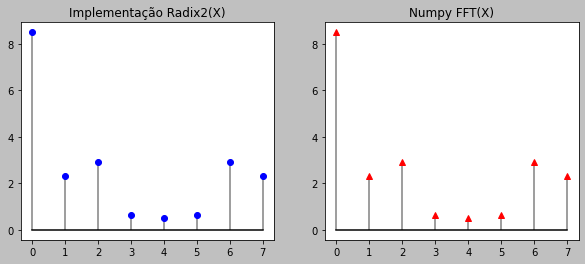


Para 9 pontos, X[n] é:
 [6 8 5 4 5 6 0 0 0]


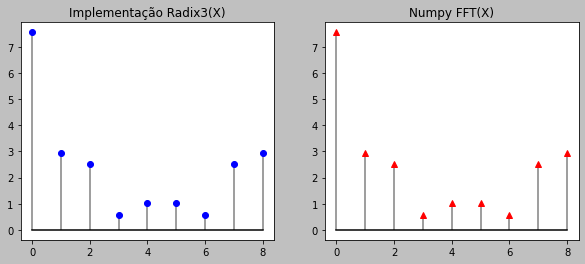

In [ ]:
print("X[n] = ", l)
pts2 = [8, 9]
func = [Radix_2, Radix_3]
for i in range(len(pts2)):
  X = padding(l, pts2[i])
  print("Para", pts2[i], "pontos, X[n] é:\n", X)
  plt.figure(figsize=(10,4), facecolor="silver")
  y = func[i](X)
  plotStem(y, f"Implementação Radix{i+2}(X)", 1, "bo")
  y = np.fft.fft(X)
  plotStem(y, "Numpy FFT(X)", 2, "r^")

  plt.show()
  print()

<center> <h4> Observamos que para ambos as implementações, o resultado se torna idêntico ao obtido utilizando o Numpy FFT. Sendo assim, nossos resultados para o Radix-2 e Radix-3 estão validados.